# Analise dos dados - Filmes e programas de TV da Netflix 2021

In [1]:
# importando bibliotecas
import pandas as pd
import seaborn as srn
import matplotlib.pyplot as plt
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Lendo o arquivo CSV e conhecendo os dados

In [2]:
dataset = pd.read_csv('netflixData.csv')

In [3]:
dataset.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [4]:
dataset.shape

(5967, 13)

In [5]:
dataset.columns = ['ID', 'Título', 'Descrição', 'Diretor', 'Gênero', 'Elenco', 'País', 'Lançamento', 'avali', 'Duração', 'IMDB', 'Tipo', 'DataAdicionado']
dataset

,ID,Título,Descrição,Diretor,Gênero,Elenco,País,Lançamento,avali,Duração,IMDB,Tipo,DataAdicionado
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962,62b8b682-f191-4c10-aa04-32319329bd8d,الف مبروك,"On his wedding day, an arrogant, greedy accoun...",Ahmed Nader Galal,"Comedies, Dramas, International Movies","Ahmed Helmy, Laila Ezz El Arab, Mahmoud El Fis...",Egypt,2009.0,TV-14,115 min,7.4/10,Movie,"April 25, 2020"
5963,5bed77ab-5e31-4216-8b51-44c9a35442e6,دفعة القاهرة,A group of women leaves Kuwait to attend unive...,NaN,"International TV Shows, TV Dramas","Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",NaN,2019.0,TV-14,1 Season,NaN,TV Show,NaN
5964,4661ec0c-8692-4661-bc76-a96412b311fd,海的儿子,"Two brothers start a new life in Singapore, wh...",NaN,"International TV Shows, TV Dramas","Li Nanxing, Christopher Lee, Jesseca Liu, Appl...",NaN,2016.0,TV-14,1 Season,NaN,TV Show,NaN
5965,145c93a7-1924-403c-a933-4ede8ad66f26,반드시 잡는다,After people in his town start turning up dead...,Hong-seon Kim,"Dramas, International Movies, Thrillers",Baek Yoon-sik,South Korea,2017.0,TV-MA,110 min,6.5/10,Movie,"February 28, 2018"


In [6]:
dataset.describe()

,Lançamento
count,5964.000000
mean,2015.643863
std,7.257391
min,1925.000000
25%,2015.000000
50%,2018.000000
75%,2019.000000
max,2021.000000


## Tratando a coluna Duration - Deixando apenas os minutos e as temporadas e tranformando em inteiro

In [7]:
dataset['Duração'] = dataset['Duração'].str.replace('min','')
dataset['Duração'] = dataset['Duração'].str.replace('Season' or 'Seasons','')

## Convertendo os dados da coluna Duração de object para float

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              5967 non-null   object 
 1   Título          5967 non-null   object 
 2   Descrição       5967 non-null   object 
 3   Diretor         3903 non-null   object 
 4   Gênero          5967 non-null   object 
 5   Elenco          5437 non-null   object 
 6   País            5408 non-null   object 
 7   Lançamento      5964 non-null   float64
 8   avali           5963 non-null   object 
 9   Duração         5964 non-null   object 
 10  IMDB            5359 non-null   object 
 11  Tipo            5967 non-null   object 
 12  DataAdicionado  4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.1+ KB


In [9]:
dataset['Duração'] = pd.to_numeric(dataset['Duração'],errors = 'coerce')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              5967 non-null   object 
 1   Título          5967 non-null   object 
 2   Descrição       5967 non-null   object 
 3   Diretor         3903 non-null   object 
 4   Gênero          5967 non-null   object 
 5   Elenco          5437 non-null   object 
 6   País            5408 non-null   object 
 7   Lançamento      5964 non-null   float64
 8   avali           5963 non-null   object 
 9   Duração         5241 non-null   float64
 10  IMDB            5359 non-null   object 
 11  Tipo            5967 non-null   object 
 12  DataAdicionado  4632 non-null   object 
dtypes: float64(2), object(11)
memory usage: 606.1+ KB


## Tratando a coluna IMDB e convertendo em float

In [10]:
dataset["IMDB"].unique()

array(['6.6/10', '6.2/10', '6.4/10', '5.1/10', '7.0/10', '5.8/10',
       '6.0/10', '6.1/10', '7.5/10', '5.5/10', '7.6/10', '6.5/10',
       '6.7/10', '7.4/10', '7.7/10', '8.3/10', '5.9/10', '6.9/10', nan,
       '5.7/10', '7.9/10', '6.8/10', '4.8/10', '8.4/10', '4.7/10',
       '3.5/10', '7.2/10', '3.8/10', '4.4/10', '1.9/10', '6.3/10',
       '3.2/10', '4.6/10', '5.2/10', '5.3/10', '5.6/10', '4.0/10',
       '7.3/10', '5.0/10', '4.5/10', '2.0/10', '8.0/10', '8.8/10',
       '8.1/10', '7.8/10', '8.5/10', '5.4/10', '4.9/10', '7.1/10',
       '1.3/10', '4.1/10', '8.2/10', '2.8/10', '3.1/10', '2.5/10',
       '4.2/10', '2.4/10', '4.3/10', '8.6/10', '3.9/10', '3.0/10',
       '8.7/10', '9.0/10', '9.3/10', '2.3/10', '2.6/10', '3.7/10',
       '3.4/10', '8.9/10', '3.3/10', '9.4/10', '3.6/10', '9.1/10',
       '2.9/10', '2.2/10', '1.8/10', '2.7/10', '2.1/10', '9.2/10',
       '1.7/10'], dtype=object)

In [11]:
dataset['IMDB'] = dataset['IMDB'].str.replace('/10','')
dataset["IMDB"].unique()

array(['6.6', '6.2', '6.4', '5.1', '7.0', '5.8', '6.0', '6.1', '7.5',
       '5.5', '7.6', '6.5', '6.7', '7.4', '7.7', '8.3', '5.9', '6.9', nan,
       '5.7', '7.9', '6.8', '4.8', '8.4', '4.7', '3.5', '7.2', '3.8',
       '4.4', '1.9', '6.3', '3.2', '4.6', '5.2', '5.3', '5.6', '4.0',
       '7.3', '5.0', '4.5', '2.0', '8.0', '8.8', '8.1', '7.8', '8.5',
       '5.4', '4.9', '7.1', '1.3', '4.1', '8.2', '2.8', '3.1', '2.5',
       '4.2', '2.4', '4.3', '8.6', '3.9', '3.0', '8.7', '9.0', '9.3',
       '2.3', '2.6', '3.7', '3.4', '8.9', '3.3', '9.4', '3.6', '9.1',
       '2.9', '2.2', '1.8', '2.7', '2.1', '9.2', '1.7'], dtype=object)

In [12]:
dataset['IMDB'] = pd.to_numeric(dataset['IMDB'],errors = 'coerce')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              5967 non-null   object 
 1   Título          5967 non-null   object 
 2   Descrição       5967 non-null   object 
 3   Diretor         3903 non-null   object 
 4   Gênero          5967 non-null   object 
 5   Elenco          5437 non-null   object 
 6   País            5408 non-null   object 
 7   Lançamento      5964 non-null   float64
 8   avali           5963 non-null   object 
 9   Duração         5241 non-null   float64
 10  IMDB            5359 non-null   float64
 11  Tipo            5967 non-null   object 
 12  DataAdicionado  4632 non-null   object 
dtypes: float64(3), object(10)
memory usage: 606.1+ KB


## Verificando os dados com valores nulos

In [13]:
dataset.isnull()

,ID,Título,Descrição,Diretor,Gênero,Elenco,País,Lançamento,avali,Duração,IMDB,Tipo,DataAdicionado
0,False,False,False,True,False,True,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962,False,False,False,False,False,False,False,False,False,False,False,False,False
5963,False,False,False,True,False,False,True,False,False,False,True,False,True
5964,False,False,False,True,False,False,True,False,False,False,True,False,True
5965,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
total_null=dataset.isnull().sum() 
total_null

ID                   0
Título               0
Descrição            0
Diretor           2064
Gênero               0
Elenco             530
País               559
Lançamento           3
avali                4
Duração            726
IMDB               608
Tipo                 0
DataAdicionado    1335
dtype: int64

In [15]:
print(round(total_null*100/len(dataset),2))

ID                 0.00
Título             0.00
Descrição          0.00
Diretor           34.59
Gênero             0.00
Elenco             8.88
País               9.37
Lançamento         0.05
avali              0.07
Duração           12.17
IMDB              10.19
Tipo               0.00
DataAdicionado    22.37
dtype: float64


In [16]:
# Tratando as colunas Diretor, Elenco e País, colocando no lugar de null o valor "Não Informado"
dataset["Diretor"].fillna("Não Informado", inplace=True)
dataset["Elenco"].fillna("Não Informado", inplace=True)
dataset["País"].fillna("Não Informado", inplace=True)

In [17]:
total_null=dataset.isnull().sum() 
total_null

ID                   0
Título               0
Descrição            0
Diretor              0
Gênero               0
Elenco               0
País                 0
Lançamento           3
avali                4
Duração            726
IMDB               608
Tipo                 0
DataAdicionado    1335
dtype: int64

In [18]:
dataset['Duração'].median()

90.0

In [19]:
#Tratando a coluna duração e colocando a mediana no valores null
dataset["Duração"].fillna(dataset['Duração'].median(), inplace=True)
dataset.isnull().sum()

ID                   0
Título               0
Descrição            0
Diretor              0
Gênero               0
Elenco               0
País                 0
Lançamento           3
avali                4
Duração              0
IMDB               608
Tipo                 0
DataAdicionado    1335
dtype: int64

## Dividindo a tabela por Tipo

In [20]:
series = dataset[dataset['Tipo'].str.contains('TV Show')]
filmes = dataset[dataset['Tipo'].str.contains('Movie')]

In [21]:
dataset["Tipo"].unique()

array(['TV Show', 'Movie'], dtype=object)

In [22]:
series

,ID,Título,Descrição,Diretor,Gênero,Elenco,País,Lançamento,avali,Duração,IMDB,Tipo,DataAdicionado
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,Não Informado,Reality TV,Não Informado,United States,2020.0,TV-MA,1.0,6.6,TV Show,NaN
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,Não Informado,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1.0,6.6,TV Show,NaN
13,91c48de3-5bc6-43e8-ae4c-944a0b190687,100 Days My Prince,"Upon losing his memory, a crown prince encount...",Não Informado,"International TV Shows, Romantic TV Shows, TV ...","Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...",South Korea,2018.0,TV-14,1.0,7.5,TV Show,NaN
14,3ad83357-9327-48bb-b89d-862d61b5801e,100 Humans,One hundred hardy souls from diverse backgroun...,Não Informado,"Docuseries, Science & Nature TV","Zainab Johnson, Sammy Obeid, Alie Ward",United States,2020.0,TV-14,1.0,5.5,TV Show,NaN
20,ee4f5117-cf68-4862-b61c-310fb8c7379b,13 Reasons Why,"After a teenage girl's perplexing suicide, a c...",Não Informado,"Crime TV Shows, TV Dramas, TV Mysteries","Dylan Minnette, Katherine Langford, Kate Walsh...",United States,2020.0,TV-MA,90.0,7.5,TV Show,"June 5, 2020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,e4d88cc9-8ee2-46b9-aac6-af786e6efbdb,Zona Rosa,An assortment of talent takes the stage for a ...,Não Informado,"International TV Shows, Spanish-Language TV Sh...","Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019.0,TV-MA,1.0,5.7,TV Show,NaN
5956,80bf7986-5698-4d01-bc52-e08a8210b834,Zoo,When animal species all over the world begin a...,Não Informado,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy","James Wolk, Kristen Connolly, Nonso Anozie, No...",United States,2017.0,TV-14,90.0,6.6,TV Show,"October 3, 2017"
5960,a86d832c-1082-4b10-82a3-766bb539e3aa,Zumbo's Just Desserts,Dessert wizard Adriano Zumbo looks for the nex...,Não Informado,"International TV Shows, Reality TV","Adriano Zumbo, Rachel Khoo",Australia,2019.0,TV-PG,1.0,7.1,TV Show,"October 31, 2020"
5963,5bed77ab-5e31-4216-8b51-44c9a35442e6,دفعة القاهرة,A group of women leaves Kuwait to attend unive...,Não Informado,"International TV Shows, TV Dramas","Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",Não Informado,2019.0,TV-14,1.0,NaN,TV Show,NaN


In [23]:
filmes

,ID,Título,Descrição,Diretor,Gênero,Elenco,País,Lançamento,avali,Duração,IMDB,Tipo,DataAdicionado
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99.0,6.2,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95.0,6.4,Movie,"July 1, 2020"
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",Não Informado,Canada,2020.0,TV-14,90.0,5.1,Movie,"February 5, 2020"
5,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Pining for his high school crush for years, a ...",Rako Prijanto,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,2018.0,TV-G,102.0,7.0,Movie,"May 21, 2020"
6,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,As Ayu and Ditto finally transition from best ...,Rako Prijanto,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Indonesia,2020.0,TV-G,104.0,7.0,Movie,"June 28, 2020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5959,29166831-eb84-4a0d-b2e0-e4c13fea7c6d,Zulu Man in Japan,"In this documentary, South African rapper Nast...",Não Informado,"Documentaries, International Movies, Music & M...",Nasty C,Não Informado,2019.0,TV-MA,44.0,NaN,Movie,"September 25, 2020"
5961,06aab7f2-9756-4680-98cf-209b7ca86a9b,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,This documentary delves into the mystique behi...,Sam Dunn,"Documentaries, Music & Musicals",Não Informado,"United Kingdom, Canada, United States",2019.0,TV-MA,90.0,7.4,Movie,"March 1, 2020"
5962,62b8b682-f191-4c10-aa04-32319329bd8d,الف مبروك,"On his wedding day, an arrogant, greedy accoun...",Ahmed Nader Galal,"Comedies, Dramas, International Movies","Ahmed Helmy, Laila Ezz El Arab, Mahmoud El Fis...",Egypt,2009.0,TV-14,115.0,7.4,Movie,"April 25, 2020"
5965,145c93a7-1924-403c-a933-4ede8ad66f26,반드시 잡는다,After people in his town start turning up dead...,Hong-seon Kim,"Dramas, International Movies, Thrillers",Baek Yoon-sik,South Korea,2017.0,TV-MA,110.0,6.5,Movie,"February 28, 2018"


In [24]:
filmes['Duração'].describe()

count    3867.000000
mean       99.191621
std        29.574334
min         3.000000
25%        86.000000
50%        99.000000
75%       115.000000
max       312.000000
Name: Duração, dtype: float64

In [25]:
# Criação do histograma, considerando somente o segundo atributo da base de dados e com duas divisões (bins)
# A variável 'h' armazena as faixas de valores de Height
h = np.histogram(dataset["Duração"])
h

(array([1489,  295, 1902, 1674,  487,   99,   14,    4,    2,    1],
       dtype=int64),
 array([  1. ,  32.1,  63.2,  94.3, 125.4, 156.5, 187.6, 218.7, 249.8,
        280.9, 312. ]))

Text(0.5, 0, 'Duração')

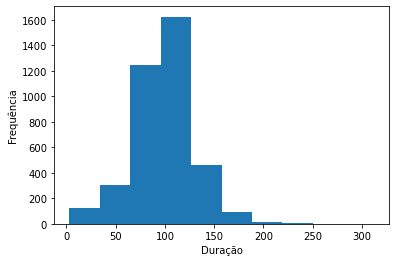

In [26]:
# Histograma com a duração das Filmes (Duração)
filmes['Duração'].plot(kind='hist')
plt.title('')
plt.ylabel('Frequência')
plt.xlabel('Duração')

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duração'>

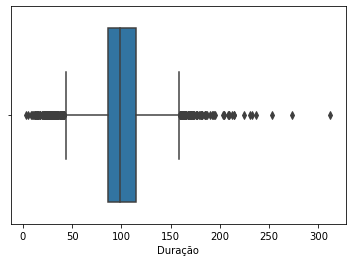

In [28]:
# Verificando como está distribuida as Durações com BOXPLOT
srn.boxplot(filmes['Duração'])

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lançamento', ylabel='Duração'>

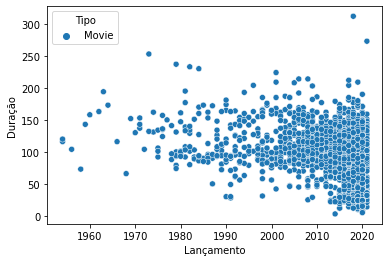

In [36]:
# Gráfico de dispersão utilizando os atributos Lançamento e Duração, agrupamento pelo Tipo
srn.scatterplot(filmes['Lançamento'], filmes['Duração'], hue = filmes["Tipo"])